In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1.filtered_df.csv')
df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,row,column,lat_min,lat_max,lon_min,lon_max,nature,entertainment,transports,art,tourism,security,accessibility,sport
Unnamed: 0,,,,,,,,,,,,,,
R1C2,1.0,2.0,52.000000,52.005000,4.124010,4.130890,1.0,3.0,5.0,0.0,3.0,0.0,5.0,0.0
R1C3,1.0,3.0,52.000000,52.005000,4.130890,4.137770,4.0,1.0,34.0,0.0,2.0,0.0,4.0,0.0
R1C4,1.0,4.0,52.000000,52.005000,4.137770,4.144650,9.0,0.0,25.0,0.0,1.0,0.0,1.0,0.0
R1C5,1.0,5.0,52.000000,52.005000,4.144650,4.151530,6.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0
R1C6,1.0,6.0,52.000000,52.005000,4.151530,4.158410,16.0,8.0,112.0,1.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R200C93,200.0,93.0,52.994975,52.999974,4.750085,4.756965,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
R200C94,200.0,94.0,52.994975,52.999974,4.756965,4.763845,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
R200C95,200.0,95.0,52.994975,52.999974,4.763845,4.770724,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,row,column,lat_min,lat_max,lon_min,lon_max,nature,entertainment,transports,art,tourism,security,accessibility,sport
count,20881.000000,20881.00000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000,20881.000000
mean,73.281404,116.22815,52.361398,52.366398,4.909893,4.916773,27.682486,2.877496,38.004119,0.361046,0.573344,0.236579,1.107179,0.000192
std,51.825812,42.74950,0.259122,0.259122,0.294114,0.294114,43.985526,11.653713,61.117727,1.263909,2.752463,2.032439,3.516233,0.013840
min,1.000000,2.00000,52.000000,52.005000,4.124010,4.130890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,86.00000,52.139997,52.144996,4.701925,4.708805,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,114.00000,52.309992,52.314992,4.894563,4.901443,17.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113.000000,147.00000,52.559986,52.564986,5.121602,5.128481,31.000000,2.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,200.000000,200.00000,52.994975,52.999974,5.486238,5.493118,1007.000000,474.000000,845.000000,34.000000,156.000000,129.000000,79.000000,1.000000


In [4]:
# initialize the visualization matrix
viz_matrix = np.zeros([int(df.row.max()), int(df.column.max())])

In [5]:
values = df.iloc[:, 6:].sum(axis = 1).to_list()
rows = df.row.to_list()
columns = df.column.to_list()

In [6]:
for value, row, column in zip(values, rows, columns):
    viz_matrix[int(row) - 1, int(column) - 1] = value

In [7]:
# normalization
viz_matrix_normalized = (viz_matrix - viz_matrix.mean()) /viz_matrix.std()

# remove outliers
normalization_intensity = 0.01
low, high = np.percentile(viz_matrix_normalized, normalization_intensity * 100), np.percentile(viz_matrix_normalized, (1 - normalization_intensity) * 100)

viz_matrix_normalized = np.where(viz_matrix_normalized < low, low, viz_matrix_normalized)
viz_matrix_normalized = np.where(viz_matrix_normalized > high, high, viz_matrix_normalized)

<AxesSubplot:>

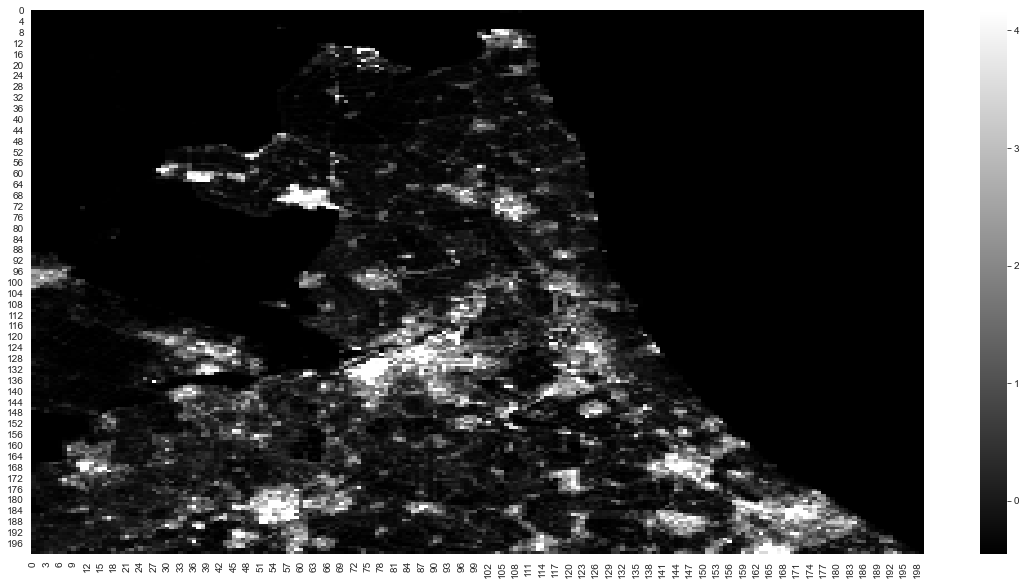

In [9]:
# plotting
fig, ax = plt.subplots(figsize=(20,10))

cmap = sns.cubehelix_palette(light = 0,
                             dark = 1,
                             hue = 0,
                             as_cmap=True)

sns.heatmap(np.rot90(viz_matrix_normalized, k = 2), cmap = cmap)